In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import date
import calendar

In [2]:
df=pd.read_csv('energydata_complete.csv',index_col='date',header=0)
df['datetime'] = df.index

In [3]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['day_of_week']=df['datetime'].dt.strftime('%w').astype('int64')
df['month']=df['datetime'].dt.strftime('%m').astype('int64')
df['hour']=df['datetime'].dt.hour
df['day_number']=df['datetime'].dt.day
df['Week_no'] = df['datetime'].dt.strftime('%W').astype('int64')
df['min'] = df['datetime'].dt.minute
df['day_of_week']=df['day_of_week'].apply(str)
df['hour']=df['hour'].apply(str)
df['min']=df['min'].apply(str)
df['period']=df[['day_of_week','hour','min']].apply(lambda x:''.join(x),axis=1)


In [4]:
df.shape

(19735, 36)

In [5]:
df.dtypes

Appliances              int64
lights                  int64
T1                    float64
RH_1                  float64
T2                    float64
RH_2                  float64
T3                    float64
RH_3                  float64
T4                    float64
RH_4                  float64
T5                    float64
RH_5                  float64
T6                    float64
RH_6                  float64
T7                    float64
RH_7                  float64
T8                    float64
RH_8                  float64
T9                    float64
RH_9                  float64
T_out                 float64
Press_mm_hg           float64
RH_out                float64
Windspeed             float64
Visibility            float64
Tdewpoint             float64
rv1                   float64
rv2                   float64
datetime       datetime64[ns]
day_of_week            object
month                   int64
hour                   object
day_number              int64
Week_no   

In [6]:
df['period'].count()

19735

In [7]:
df

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,rv1,rv2,datetime,day_of_week,month,hour,day_number,Week_no,min,period
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,13.275433,13.275433,2016-01-11 17:00:00,1,1,17,11,2,0,1170
2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,18.606195,18.606195,2016-01-11 17:10:00,1,1,17,11,2,10,11710
2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,28.642668,28.642668,2016-01-11 17:20:00,1,1,17,11,2,20,11720
2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,45.410389,45.410389,2016-01-11 17:30:00,1,1,17,11,2,30,11730
2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,10.084097,10.084097,2016-01-11 17:40:00,1,1,17,11,2,40,11740
2016-01-11 17:50:00,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,45.730000,...,44.919484,44.919484,2016-01-11 17:50:00,1,1,17,11,2,50,11750
2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,45.790000,...,47.233763,47.233763,2016-01-11 18:00:00,1,1,18,11,2,0,1180
2016-01-11 18:10:00,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,45.863333,...,33.039890,33.039890,2016-01-11 18:10:00,1,1,18,11,2,10,11810
2016-01-11 18:20:00,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,45.790000,...,31.455702,31.455702,2016-01-11 18:20:00,1,1,18,11,2,20,11820


In [8]:
phase = df.groupby(['date','month','day_of_week','hour','day_number','min','datetime','period']).mean()
phase["Total"]=phase["Appliances"] + phase["lights"]
phase = phase.reset_index()
phase.set_index('date', inplace=True)

In [9]:
phase.dtypes

month                   int64
day_of_week            object
hour                   object
day_number              int64
min                    object
datetime       datetime64[ns]
period                 object
Appliances              int64
lights                  int64
T1                    float64
RH_1                  float64
T2                    float64
RH_2                  float64
T3                    float64
RH_3                  float64
T4                    float64
RH_4                  float64
T5                    float64
RH_5                  float64
T6                    float64
RH_6                  float64
T7                    float64
RH_7                  float64
T8                    float64
RH_8                  float64
T9                    float64
RH_9                  float64
T_out                 float64
Press_mm_hg           float64
RH_out                float64
Windspeed             float64
Visibility            float64
Tdewpoint             float64
rv1       

In [10]:
phase['day_of_week']=phase['day_of_week'].apply(int)
phase['hour']=phase['hour'].apply(int)
phase['min']=phase['min'].apply(int)
phase['period']=phase['period'].apply(int)


In [11]:
phase.dtypes

month                   int64
day_of_week             int64
hour                    int64
day_number              int64
min                     int64
datetime       datetime64[ns]
period                  int64
Appliances              int64
lights                  int64
T1                    float64
RH_1                  float64
T2                    float64
RH_2                  float64
T3                    float64
RH_3                  float64
T4                    float64
RH_4                  float64
T5                    float64
RH_5                  float64
T6                    float64
RH_6                  float64
T7                    float64
RH_7                  float64
T8                    float64
RH_8                  float64
T9                    float64
RH_9                  float64
T_out                 float64
Press_mm_hg           float64
RH_out                float64
Windspeed             float64
Visibility            float64
Tdewpoint             float64
rv1       

In [12]:
phase.shape

(19735, 37)

In [13]:
phase

,month,day_of_week,hour,day_number,min,datetime,period,Appliances,lights,T1,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Week_no,Total
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,1,1,17,11,0,2016-01-11 17:00:00,1170,60,30,19.890000,...,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,2,90
2016-01-11 17:10:00,1,1,17,11,10,2016-01-11 17:10:00,11710,60,30,19.890000,...,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,2,90
2016-01-11 17:20:00,1,1,17,11,20,2016-01-11 17:20:00,11720,50,30,19.890000,...,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,2,80
2016-01-11 17:30:00,1,1,17,11,30,2016-01-11 17:30:00,11730,50,40,19.890000,...,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,2,90
2016-01-11 17:40:00,1,1,17,11,40,2016-01-11 17:40:00,11740,60,40,19.890000,...,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,2,100
2016-01-11 17:50:00,1,1,17,11,50,2016-01-11 17:50:00,11750,50,40,19.890000,...,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484,2,90
2016-01-11 18:00:00,1,1,18,11,0,2016-01-11 18:00:00,1180,60,50,19.890000,...,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763,2,110
2016-01-11 18:10:00,1,1,18,11,10,2016-01-11 18:10:00,11810,60,50,19.856667,...,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890,2,110
2016-01-11 18:20:00,1,1,18,11,20,2016-01-11 18:20:00,11820,60,40,19.790000,...,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702,2,100


# Logarithmic transformation

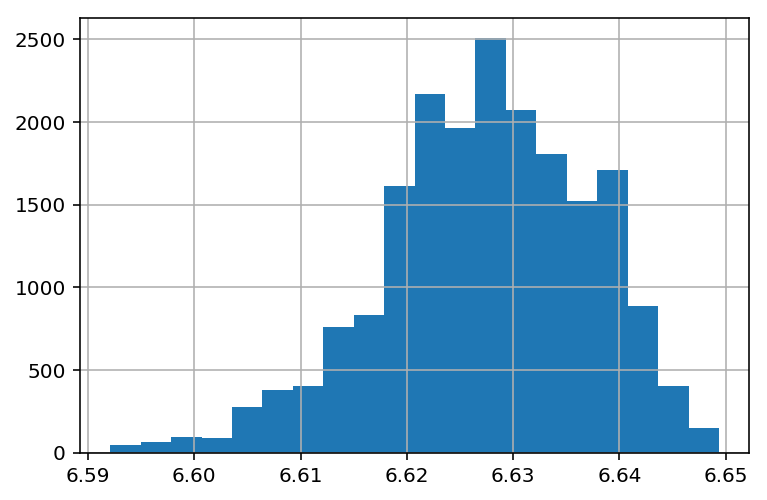

In [14]:
import numpy as np
phase['Press_mm_hg'] = np.log(phase['Press_mm_hg'])
phase['Press_mm_hg'].hist(bins=20)

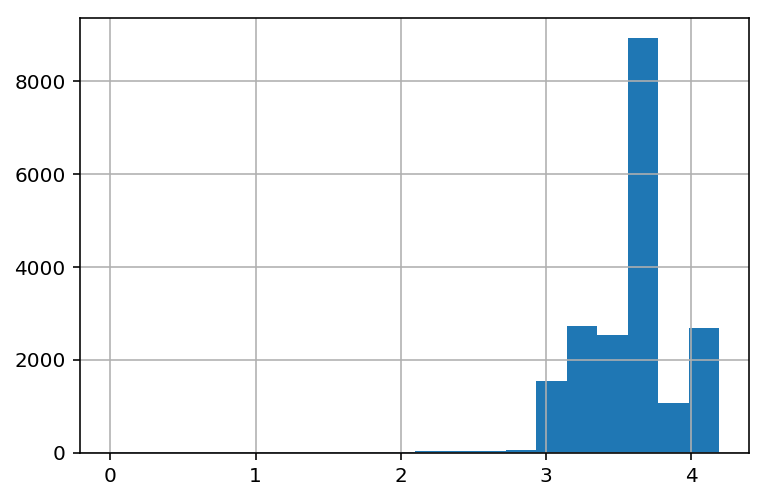

In [15]:
import numpy as np
phase['Visibility'] = np.log(phase['Visibility'])
phase['Visibility'].hist(bins=20)

In [16]:
phase.dtypes

month                   int64
day_of_week             int64
hour                    int64
day_number              int64
min                     int64
datetime       datetime64[ns]
period                  int64
Appliances              int64
lights                  int64
T1                    float64
RH_1                  float64
T2                    float64
RH_2                  float64
T3                    float64
RH_3                  float64
T4                    float64
RH_4                  float64
T5                    float64
RH_5                  float64
T6                    float64
RH_6                  float64
T7                    float64
RH_7                  float64
T8                    float64
RH_8                  float64
T9                    float64
RH_9                  float64
T_out                 float64
Press_mm_hg           float64
RH_out                float64
Windspeed             float64
Visibility            float64
Tdewpoint             float64
rv1       

In [17]:
phase1 = phase
phase1.drop(['day_number','min','Week_no','datetime','Total','rv1','rv2'],axis=1,inplace=True)

In [18]:
phase1.dtypes

month            int64
day_of_week      int64
hour             int64
period           int64
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
dtype: object

# Correlation with heat map

,month,day_of_week,hour,period,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
month,1,-0.008,-0.0074,-0.0071,-0.012,-0.18,0.71,-0.094,0.53,-0.098,0.79,-0.41,0.79,-0.26,0.79,-0.23,0.6,-0.81,0.83,-0.17,0.79,-0.28,0.89,-0.23,0.6,-0.06,-0.34,-0.26,-0.049,0.47
day_of_week,-0.008,1,-0.005,0.53,0.016,-0.11,-0.043,-0.048,-0.028,-0.039,-0.019,-0.068,-0.063,-0.035,-0.053,-0.041,0.015,-0.0036,-0.048,-0.039,-0.088,8e-05,-0.033,-0.05,0.004,-0.017,-0.0066,-0.053,-0.06,-0.0011
hour,-0.0074,-0.005,1,0.51,0.22,0.26,0.18,0.019,0.25,-0.18,0.038,-0.052,0.088,-0.019,0.071,0.097,0.2,-0.19,0.057,-0.16,0.11,-0.29,-0.0028,-0.27,0.22,-0.0062,-0.35,0.096,0.036,0.024
period,-0.0071,0.53,0.51,1,0.17,0.037,0.069,-0.013,0.18,-0.18,0.016,-0.073,0.021,-0.032,-0.002,0.001,0.2,-0.16,0.0072,-0.13,0.0029,-0.2,-0.018,-0.19,0.19,-0.019,-0.29,0.067,0.0024,0.024
Appliances,-0.012,0.016,0.22,0.17,1,0.2,0.055,0.086,0.12,-0.06,0.085,0.036,0.04,0.017,0.02,0.007,0.12,-0.083,0.026,-0.056,0.04,-0.094,0.01,-0.051,0.099,-0.035,-0.15,0.087,0.026,0.015
lights,-0.18,-0.11,0.26,0.037,0.2,1,-0.024,0.11,-0.0056,0.051,-0.097,0.13,-0.0089,0.11,-0.079,0.14,-0.079,0.15,-0.14,0.035,-0.071,0.013,-0.16,-0.0088,-0.074,-0.011,0.069,0.06,0.022,-0.036
T1,0.71,-0.043,0.18,0.069,0.055,-0.024,1,0.16,0.84,-0.0025,0.89,-0.029,0.88,0.098,0.89,-0.015,0.65,-0.62,0.84,0.14,0.83,-0.0064,0.84,0.072,0.68,-0.15,-0.35,-0.088,-0.013,0.57
RH_1,-0.094,-0.048,0.019,-0.013,0.086,0.11,0.16,1,0.27,0.8,0.25,0.84,0.11,0.88,0.21,0.3,0.32,0.25,0.021,0.8,-0.03,0.74,0.12,0.76,0.34,-0.29,0.27,0.2,-0.002,0.64
T2,0.53,-0.028,0.25,0.18,0.12,-0.0056,0.84,0.27,1,-0.17,0.74,0.12,0.76,0.23,0.72,0.03,0.8,-0.58,0.66,0.23,0.58,0.069,0.68,0.16,0.79,-0.13,-0.51,0.052,0.0063,0.58
RH_2,-0.098,-0.039,-0.18,-0.18,-0.06,0.051,-0.0025,0.8,-0.17,1,0.14,0.68,-0.047,0.72,0.11,0.25,-0.0097,0.39,-0.051,0.69,-0.041,0.68,0.055,0.68,0.034,-0.26,0.58,0.069,-0.028,0.5


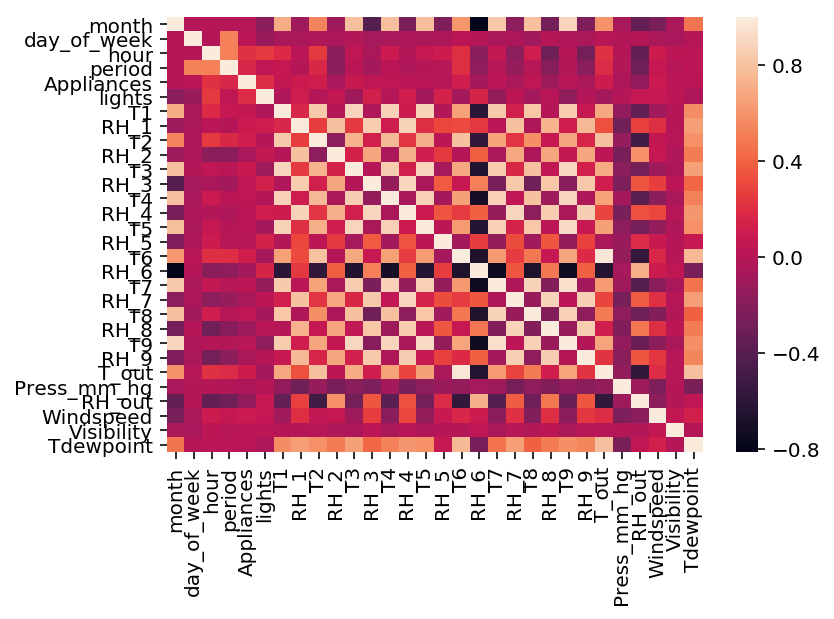

In [19]:
corr = phase1.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

In [20]:
phase1.describe()

,month,day_of_week,hour,period,Appliances,lights,T1,RH_1,T2,RH_2,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,3.101647,3.006790,11.502002,16952.790474,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,...,22.029107,42.936165,19.485828,41.552401,7.411665,6.627362,79.750418,4.039752,3.592755,3.760707
std,1.339200,1.981713,6.921953,19971.418560,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,...,1.956162,5.224361,2.014712,4.151497,5.317409,0.009815,14.901088,2.451221,0.354316,4.194648
min,1.000000,0.000000,0.000000,0.000000,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,...,16.306667,29.600000,14.890000,29.166667,-5.000000,6.592085,24.000000,0.000000,0.000000,-6.600000
25%,2.000000,1.000000,6.000000,2050.000000,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,...,20.790000,39.066667,18.000000,38.500000,3.666667,6.621317,70.333333,2.000000,3.367296,0.900000
50%,3.000000,3.000000,12.000000,5610.000000,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,...,22.100000,42.375000,19.390000,40.900000,6.916667,6.628174,83.666667,3.666667,3.688879,3.433333
75%,4.000000,5.000000,17.000000,31540.000000,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,...,23.390000,46.536000,20.600000,44.338095,10.408333,6.634546,91.666667,5.500000,3.688879,6.566667
max,5.000000,6.000000,23.000000,62350.000000,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,...,27.230000,58.780000,24.500000,53.326667,26.100000,6.649373,100.000000,14.000000,4.189655,15.500000


In [21]:
phase1

,month,day_of_week,hour,period,Appliances,lights,T1,RH_1,T2,RH_2,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,1,1,17,1170,60,30,19.890000,47.596667,19.200000,44.790000,...,18.200000,48.900000,17.033333,45.530000,6.600000,6.597828,92.000000,7.000000,4.143135,5.300000
2016-01-11 17:10:00,1,1,17,11710,60,30,19.890000,46.693333,19.200000,44.722500,...,18.200000,48.863333,17.066667,45.560000,6.483333,6.597964,92.000000,6.666667,4.080358,5.200000
2016-01-11 17:20:00,1,1,17,11720,50,30,19.890000,46.300000,19.200000,44.626667,...,18.200000,48.730000,17.000000,45.500000,6.366667,6.598100,92.000000,6.333333,4.013375,5.100000
2016-01-11 17:30:00,1,1,17,11730,50,40,19.890000,46.066667,19.200000,44.590000,...,18.100000,48.590000,17.000000,45.400000,6.250000,6.598237,92.000000,6.000000,3.941582,5.000000
2016-01-11 17:40:00,1,1,17,11740,60,40,19.890000,46.333333,19.200000,44.530000,...,18.100000,48.590000,17.000000,45.400000,6.133333,6.598373,92.000000,5.666667,3.864232,4.900000
2016-01-11 17:50:00,1,1,17,11750,50,40,19.890000,46.026667,19.200000,44.500000,...,18.100000,48.590000,17.000000,45.290000,6.016667,6.598509,92.000000,5.333333,3.780395,4.800000
2016-01-11 18:00:00,1,1,18,1180,60,50,19.890000,45.766667,19.200000,44.500000,...,18.100000,48.590000,17.000000,45.290000,5.900000,6.598645,92.000000,5.000000,3.688879,4.700000
2016-01-11 18:10:00,1,1,18,11810,60,50,19.856667,45.560000,19.200000,44.500000,...,18.100000,48.590000,17.000000,45.290000,5.916667,6.598736,91.833333,5.166667,3.688879,4.683333
2016-01-11 18:20:00,1,1,18,11820,60,40,19.790000,45.597500,19.200000,44.433333,...,18.100000,48.590000,17.000000,45.290000,5.933333,6.598827,91.666667,5.333333,3.688879,4.666667


# Logistic Regression for Feature Selection

In [22]:
# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [23]:
X = phase1.drop(['Appliances'],axis=1)
y = phase1['Appliances']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [24]:
X

,month,day_of_week,hour,period,lights,T1,RH_1,T2,RH_2,T3,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,1,1,17,1170,30,19.890000,47.596667,19.200000,44.790000,19.790000,...,18.200000,48.900000,17.033333,45.530000,6.600000,6.597828,92.000000,7.000000,4.143135,5.300000
2016-01-11 17:10:00,1,1,17,11710,30,19.890000,46.693333,19.200000,44.722500,19.790000,...,18.200000,48.863333,17.066667,45.560000,6.483333,6.597964,92.000000,6.666667,4.080358,5.200000
2016-01-11 17:20:00,1,1,17,11720,30,19.890000,46.300000,19.200000,44.626667,19.790000,...,18.200000,48.730000,17.000000,45.500000,6.366667,6.598100,92.000000,6.333333,4.013375,5.100000
2016-01-11 17:30:00,1,1,17,11730,40,19.890000,46.066667,19.200000,44.590000,19.790000,...,18.100000,48.590000,17.000000,45.400000,6.250000,6.598237,92.000000,6.000000,3.941582,5.000000
2016-01-11 17:40:00,1,1,17,11740,40,19.890000,46.333333,19.200000,44.530000,19.790000,...,18.100000,48.590000,17.000000,45.400000,6.133333,6.598373,92.000000,5.666667,3.864232,4.900000
2016-01-11 17:50:00,1,1,17,11750,40,19.890000,46.026667,19.200000,44.500000,19.790000,...,18.100000,48.590000,17.000000,45.290000,6.016667,6.598509,92.000000,5.333333,3.780395,4.800000
2016-01-11 18:00:00,1,1,18,1180,50,19.890000,45.766667,19.200000,44.500000,19.790000,...,18.100000,48.590000,17.000000,45.290000,5.900000,6.598645,92.000000,5.000000,3.688879,4.700000
2016-01-11 18:10:00,1,1,18,11810,50,19.856667,45.560000,19.200000,44.500000,19.730000,...,18.100000,48.590000,17.000000,45.290000,5.916667,6.598736,91.833333,5.166667,3.688879,4.683333
2016-01-11 18:20:00,1,1,18,11820,40,19.790000,45.597500,19.200000,44.433333,19.730000,...,18.100000,48.590000,17.000000,45.290000,5.933333,6.598827,91.666667,5.333333,3.688879,4.666667


In [29]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
    # create the RFE model and select 3 attributes
rfe = RFE(model, 5)
rfe = rfe.fit(X_train, y_train)
    # summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
print(rfe.n_features_)
    #Check the accuracy of the model
rfe.score(X_train, y_train)

[ True False False False False  True False False False  True False False
 False  True False False False False False False False False False False
  True False False False False]
[ 1 13 24 25 21  1  9  4 10  1  8  6 14  1 20 12 23  7 19  3 18  2 16 11  1
 22 15  5 17]
5


0.22983929347039236

# Logistic Regression After Scaling

In [30]:
phase1.dtypes

month            int64
day_of_week      int64
hour             int64
period           int64
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
dtype: object

## GBM  with lights

## Accuracy 0.2611045

In [33]:
feature_columns = ['lights','T1','RH_1','T2','RH_2','T3','RH_3','T4','RH_4','T5','RH_5','T6','RH_6', 'T7','RH_7','T8','RH_8','T9','RH_9','T_out','RH_out','Press_mm_hg','Windspeed','Tdewpoint','day_of_week','period']

## GBM with no lights

## Accuracy 0.2555311

In [37]:
feature_columns = ['T1','RH_1','T2','RH_2','T3','RH_3','T4','RH_4','T5','RH_5','T6','RH_6', 'T7','RH_7','T8','RH_8','T9','RH_9','T_out','RH_out','Press_mm_hg','Windspeed','Tdewpoint','day_of_week','period']

## GBM with no lights and no weather data
## Accuracy 0.25384225

In [41]:
feature_columns = ['T1','RH_1','T2','RH_2','T3','RH_3','T4','RH_4','T5','RH_5','T6','RH_6', 'T7','RH_7','T8','RH_8','T9','RH_9','day_of_week','period']

## GBM with no temperature and humidity data

## Accuracy 0.23712210

In [45]:
feature_columns = ['lights','T_out','RH_out','Press_mm_hg','Windspeed','Tdewpoint','day_of_week','period']

## GBM with only weather and time information

## Accuracy 0.22681973953

In [49]:
feature_columns = ['T_out','RH_out','Press_mm_hg','Windspeed','Tdewpoint','day_of_week','period']

## Try 1

In [125]:
feature_columns = ['

In [126]:
from sklearn.preprocessing import scale
X_train_scale=scale(X_train[feature_columns])
X_test_scale=scale(X_test[feature_columns])

In [127]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(penalty='l2',C=1)
log.fit(X_train_scale,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [128]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,log.predict(X_test_scale))

0.2339131903394697

# RMSE

In [57]:
from sklearn.metrics import mean_squared_error
def rmse(correct,estimated):
    rmse_val = np.sqrt(mean_squared_error(correct,estimated)) 
    return rmse_val


# MAPE

In [33]:
import numpy as np
def mean_absolute_percentage_error1(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# R2

In [42]:
from sklearn.metrics import r2_score
# r2_score(correct,estimated)

# MAE 

In [71]:
import numpy as np
def mean_absolute_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs(y_true - y_pred)) 

# Prediction Model

# Linear Regression

In [127]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [128]:
X = phase2[['T1','T_out','RH_out','Press_mm_hg','Windspeed','Tdewpoint','day_of_week','period']]
y = phase2['Appliances']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [273]:
X = phase1.drop(['Appliances'],axis=1)
y = phase1['Appliances']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [26]:
X = phase1[['T1','RH_1','T2','RH_2','T3','RH_3','T4','RH_4','T5','RH_5','T6','RH_6', 'T7','RH_7','T8','RH_8','T9','RH_9','T_out','RH_out','Press_mm_hg','Windspeed','Tdewpoint','day_of_week','period']]
y = phase1['Appliances']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [129]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [130]:
prediction = lm.predict(X_test)

In [29]:
print(prediction)

[  39.45717116  270.01475477   38.65130734 ...,   72.85434877  119.08223948
   62.2954974 ]


In [30]:
lm.score(X_test,y_test)

0.14928060453420999

In [131]:
rmse(prediction,y_test)

99.110361920692981

In [132]:
mean_absolute_error(prediction,y_test)

57.740649123285685

In [133]:
r2_score(prediction,y_test)

-17.441620861373568

In [134]:
mean_absolute_percentage_error(prediction,y_test)

57.628397780485543

In [290]:
y_test

array([  39.45717116,  270.01475477,   38.65130734, ...,   72.85434877,
        119.08223948,   62.2954974 ])

# Random Forest 

In [174]:
phase2 = phase1
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(phase2['Appliances'])
# Remove the labels from the features
# axis 1 refers to the columns

features = phase2[['lights','period','T2','T6','T_out','hour']]
#features= phase2.drop('Appliances', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

predictions = rf.predict(test_features)

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')







Mean Absolute Error: 36.97 degrees.
Accuracy: 60.46 %.


In [164]:
phase2 = phase1

In [165]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(phase2['Appliances'])
# Remove the labels from the features
# axis 1 refers to the columns

features = phase2[['lights','period','T2']]
#features= phase2.drop('Appliances', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [166]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [97]:
# The baseline predictions are the historical averages
baseline_preds = test_features[:, feature_list.index('T1')]
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))


Average baseline error:  75.11


In [167]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [168]:
predictions = rf.predict(test_features)

In [169]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 44.9 degrees.


In [170]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 50.68 %.


In [100]:
mape

array([  43.8       ,   23.55555556,    2.4       , ...,  144.975     ,
         44.0125    ,   37.42      ])

In [101]:
predictions

array([  57.52,  111.2 ,   51.2 , ...,  195.98,  115.21,  137.42])

In [102]:
test_labels

array([ 40,  90,  50, ...,  80,  80, 100], dtype=int64)

In [103]:
mean_absolute_percentage_error(test_labels,predictions)

34.948273541797278

In [104]:
rmse(test_labels,predictions)

69.898027483820314

In [105]:
r2_score(test_labels,predictions)

0.50817366470537295

In [106]:
mean_absolute_error(test_labels,predictions)

33.82500202675314

# Neural Networks

In [171]:
!pip install git+git://github.com/Theano/Theano.git

  Cloning git://github.com/Theano/Theano.git to /private/var/folders/k3/zxzdhqsn0z9gy8x69r6h6fqr0000gn/T/pip-0jp9j_ah-build
  Running setup.py install for Theano ... done


In [173]:
!pip install theano

In [174]:
!pip install keras

    100% |████████████████████████████████| 337kB 2.9MB/s ta 0:00:011


In [175]:
!pip install tensorflow

    100% |████████████████████████████████| 43.2MB 33kB/s  eta 0:00:01    53% |█████████████████               | 23.0MB 60.0MB/s eta 0:00:01
    100% |████████████████████████████████| 3.1MB 482kB/s eta 0:00:01
    100% |████████████████████████████████| 1.2MB 1.1MB/s eta 0:00:01
    100% |████████████████████████████████| 81kB 6.0MB/s eta 0:00:01
    100% |████████████████████████████████| 1.5MB 938kB/s eta 0:00:01
    100% |████████████████████████████████| 81kB 11.2MB/s ta 0:00:01
    100% |████████████████████████████████| 890kB 1.4MB/s eta 0:00:01
  Running setup.py bdist_wheel for absl-py ... done
  Stored in directory: /Users/rishabhjain/Library/Caches/pip/wheels/3c/0f/0a/6c94612a8c26070755559045612ca3645fea91c11f2148363e
  Running setup.py bdist_wheel for termcolor ... done
  Stored in directory: /Users/rishabhjain/Library/Caches/pip/wheels/de/f7/bf/1bcac7bf30549e6a4957382e2ecab04c88e513117207067b03
  Running setup.py bdist_wheel for gast ... done
  Stored in directory: /Users/

In [135]:
import pandas as pd
import numpy as np
from keras import initializers
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

In [136]:
def scale_nn(X_nn, y_nn):
    '''Scale data to fit Keras NN input format'''
    
    #Import Scaler to standardize variable data
    scaler = StandardScaler()
    X_nn = scaler.fit_transform(X_nn)
    
    #Use keras utils to format target data
    y_nn = np_utils.to_categorical(y_nn)
    
    return X_nn, y_nn

In [137]:
def build_nn(X_nn, y_nn, input_dim):
    '''Build your Neural Network structure'''
    
    # Train test split your data to prevent over fitting
    X_nn_train, X_nn_test, y_nn_train, y_nn_test = train_test_split(X_nn, y_nn)
    
    # Initialize your sequential NN
    # You can change the model to something other than sequential, for more info check Keras' documentation.
    model = Sequential()
    
    # This part adds the number of perceptrons you would like to use in the first layer
    # The input dimension is the number of variables you have in your data
    # The activation parameter is what kind of function you to use for your perceptron function
    # You can use a variety of different perceptron functions but relu is very common
    model.add(Dense(300, input_dim=input_dim, kernel_initializer='normal', activation='relu'))
    
    # Build the second layer of your neural network
    model.add(Dense(300, kernel_initializer='normal', activation='relu'))
    
    # The last layer is your output layer so the number of perceptions must be equal to the 
    # amount target classes your data set has.
    # Softmax is a good function for binary data, but for more information check the Keras
    # documentation.
    model.add(Dense(y_nn_test.shape[1], kernel_initializer='normal', activation='softmax'))
    
    # Lastly you want to define your loss function, your optimizer and your metric for scoring.
    # This will vary based on your goals, but for a binary target this parameter configuration
    # works well. 
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Return your neural network
    return model

In [138]:
def run_nn(X_nn, y_nn, num_folds):
    '''Run your neural network and output your prediction probabilities'''
    
    # Initialize the roc-auc score running average list
    # Initialize a count to print the number of folds
    av_roc = 0.
    count = 0
    
    # Run the standard scaler function we defined before
    X_nn, y_nn = scale_nn(X_nn, y_nn)
    
    # Initialize your cross vailidation
    # Set shuffle equals True to randomize your splits on your training data
    kf = KFold(n_splits=num_folds, random_state=41, shuffle=True)
    
    # Set up for loop to run for the number of cross vals you defined in your parameter
    for train_index, test_index in kf.split(X_nn):
        count += 1
        print('Fold #: ', count)
        
        # This indexs your train and test data for your cross validation and sorts them
        # in random order, since we used shuffle equals True
        X_nn_train, X_nn_test = X_nn[train_index], X_nn[test_index]
        y_nn_train, y_nn_test = y_nn[train_index], y_nn[test_index]
        
        # Define your input dimension, which must equal the number of variables in your
        # training data. If it does not you will get a goofy error.
        input_dim = X_nn_train.shape[1]
        
        # Initialize your neural network structure we defined above to build your model
        print("Building model...")
        model = build_nn(X_nn, y_nn, input_dim)
        
        # Fit your model
        # You can select the number of epochs and and batch size you would like to use
        # for your neural network. 
        print("Training model...")
        model.fit(X_nn_train, y_nn_train, epochs=15, batch_size=30, verbose=0)
        
        # Your model is fit. Time to predict our output and test our training data
        print("Evaluating model...")
        test_preds = model.predict_proba(X_nn_test, verbose=0)
        roc = roc_auc_score(y_nn_test, test_preds)
        scores = model.evaluate(X_nn_test, y_nn_test)
        print(scores)
        
        # Print your model summary
        print(model.summary())
        
        # Print your ROC-AUC score for your kfold, and the running score average
        print('ROC: ', roc)
        av_roc += roc
        print('Continued Avg: ', av_roc/count)
# Print your final average ROC-AUC score and organize your models predictions in a dataframe
    print('Average ROC:', av_roc/num_folds)
    predict_proba_all = pd.DataFrame(model.predict_proba(X_nn, verbose=0))
    return pd.DataFrame(predict_proba_all)

In [185]:
y

date
2016-01-11 17:00:00     60
2016-01-11 17:10:00     60
2016-01-11 17:20:00     50
2016-01-11 17:30:00     50
2016-01-11 17:40:00     60
2016-01-11 17:50:00     50
2016-01-11 18:00:00     60
2016-01-11 18:10:00     60
2016-01-11 18:20:00     60
2016-01-11 18:30:00     70
2016-01-11 18:40:00    230
2016-01-11 18:50:00    580
2016-01-11 19:00:00    430
2016-01-11 19:10:00    250
2016-01-11 19:20:00    100
2016-01-11 19:30:00    100
2016-01-11 19:40:00     90
2016-01-11 19:50:00     70
2016-01-11 20:00:00     80
2016-01-11 20:10:00    140
2016-01-11 20:20:00    120
2016-01-11 20:30:00    190
2016-01-11 20:40:00    110
2016-01-11 20:50:00    110
2016-01-11 21:00:00    110
2016-01-11 21:10:00    110
2016-01-11 21:20:00    100
2016-01-11 21:30:00    100
2016-01-11 21:40:00    100
2016-01-11 21:50:00    100
                      ... 
2016-05-27 13:10:00    280
2016-05-27 13:20:00    240
2016-05-27 13:30:00    250
2016-05-27 13:40:00    220
2016-05-27 13:50:00    230
2016-05-27 14:00:00    

In [139]:
X1 = phase2[['T1','T_out','RH_out','Press_mm_hg','Windspeed','Tdewpoint','day_of_week','period']]

In [193]:
X1

,T1,T2,T3
date,,,
2016-01-11 17:00:00,19.890000,19.200000,19.790000
2016-01-11 17:10:00,19.890000,19.200000,19.790000
2016-01-11 17:20:00,19.890000,19.200000,19.790000
2016-01-11 17:30:00,19.890000,19.200000,19.790000
2016-01-11 17:40:00,19.890000,19.200000,19.790000
2016-01-11 17:50:00,19.890000,19.200000,19.790000
2016-01-11 18:00:00,19.890000,19.200000,19.790000
2016-01-11 18:10:00,19.856667,19.200000,19.730000
2016-01-11 18:20:00,19.790000,19.200000,19.730000


In [140]:
y1 = phase2['Appliances']

(19735,)

In [120]:
nn = run_nn(X1,y1,4)

Fold #:  1
Building model...
Training model...
Evaluating model...


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [141]:
from sklearn.neural_network import MLPClassifier
X=phase2[['T1','T_out','RH_out','Press_mm_hg','Windspeed','Tdewpoint','day_of_week','period']]
y = phase2['Appliances']

In [122]:
phase2

,month,day_of_week,hour,period,Appliances,lights,T1,RH_1,T2,RH_2,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,1,1,17,1170,60,30,19.890000,47.596667,19.200000,44.790000,...,18.200000,48.900000,17.033333,45.530000,6.600000,6.597828,92.000000,7.000000,4.143135,5.300000
2016-01-11 17:10:00,1,1,17,11710,60,30,19.890000,46.693333,19.200000,44.722500,...,18.200000,48.863333,17.066667,45.560000,6.483333,6.597964,92.000000,6.666667,4.080358,5.200000
2016-01-11 17:20:00,1,1,17,11720,50,30,19.890000,46.300000,19.200000,44.626667,...,18.200000,48.730000,17.000000,45.500000,6.366667,6.598100,92.000000,6.333333,4.013375,5.100000
2016-01-11 17:30:00,1,1,17,11730,50,40,19.890000,46.066667,19.200000,44.590000,...,18.100000,48.590000,17.000000,45.400000,6.250000,6.598237,92.000000,6.000000,3.941582,5.000000
2016-01-11 17:40:00,1,1,17,11740,60,40,19.890000,46.333333,19.200000,44.530000,...,18.100000,48.590000,17.000000,45.400000,6.133333,6.598373,92.000000,5.666667,3.864232,4.900000
2016-01-11 17:50:00,1,1,17,11750,50,40,19.890000,46.026667,19.200000,44.500000,...,18.100000,48.590000,17.000000,45.290000,6.016667,6.598509,92.000000,5.333333,3.780395,4.800000
2016-01-11 18:00:00,1,1,18,1180,60,50,19.890000,45.766667,19.200000,44.500000,...,18.100000,48.590000,17.000000,45.290000,5.900000,6.598645,92.000000,5.000000,3.688879,4.700000
2016-01-11 18:10:00,1,1,18,11810,60,50,19.856667,45.560000,19.200000,44.500000,...,18.100000,48.590000,17.000000,45.290000,5.916667,6.598736,91.833333,5.166667,3.688879,4.683333
2016-01-11 18:20:00,1,1,18,11820,60,40,19.790000,45.597500,19.200000,44.433333,...,18.100000,48.590000,17.000000,45.290000,5.933333,6.598827,91.666667,5.333333,3.688879,4.666667


In [142]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)

In [143]:
clf.fit(X_train, y_train) 

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [125]:
clf.predict(X_test,y_test)

TypeError: predict() takes 2 positional arguments but 3 were given

In [144]:
X1 = phase2[['T1','T_out','RH_out','Press_mm_hg','Windspeed','Tdewpoint','day_of_week','period']]
y1 = phase2['Appliances']

In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1,test_size=0.30, random_state=42)

In [146]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [147]:
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [148]:
from sklearn.neural_network import MLPClassifier


In [149]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

In [150]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [151]:
predictions = mlp.predict(X_test)

In [152]:
rmse(y_test,predictions)

105.07603346456882

In [247]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [238]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

         10       0.00      0.00      0.00         2
         20       0.00      0.00      0.00       101
         30       0.00      0.00      0.00       178
         40       0.30      0.18      0.23       476
         50       0.25      0.82      0.38      1120
         60       0.20      0.20      0.20       799
         70       0.00      0.00      0.00       410
         80       0.00      0.00      0.00       311
         90       0.00      0.00      0.00       239
        100       0.09      0.05      0.06       236
        110       0.04      0.01      0.01       192
        120       0.00      0.00      0.00       131
        130       0.00      0.00      0.00        74
        140       0.00      0.00      0.00        56
        150       0.00      0.00      0.00        34
        160       0.00      0.00      0.00        17
        170       0.00      0.00      0.00        20
        180       0.00      0.00      0.00   

/Users/rishabhjain/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# RMS

In [270]:
def rmse(predictions, targets):

    differences = predictions - targets                       #the DIFFERENCEs.

    differences_squared = differences ** 2                    #the SQUAREs of ^

    mean_of_differences_squared = differences_squared.mean()  #the MEAN of ^

    rmse_val = np.sqrt(mean_of_differences_squared)           #ROOT of ^

    return rmse_val  

In [271]:
rmse(y_test,y_train)

nan

In [28]:
X_train.dtypes

month            int64
day_of_week      int64
hour             int64
period           int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
dtype: object

In [84]:
 mean_absolute_error(y_test, prediction)

53.590356921250809

# Different Method for Feature Selection


# Removing features with low variance

In [236]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
feat = phase2
f = sel.fit_transform(feat)
data_transformed = feat.loc[:, sel.get_support()]

In [237]:
data_transformed

,month,day_of_week,hour,period,Appliances,lights,T1,RH_1,T2,RH_2,...,T7,RH_7,T8,RH_8,T9,RH_9,T_out,RH_out,Windspeed,Tdewpoint
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,1,1,17,1170,60,30,19.890000,47.596667,19.200000,44.790000,...,17.200000,41.626667,18.200000,48.900000,17.033333,45.530000,6.600000,92.000000,7.000000,5.300000
2016-01-11 17:10:00,1,1,17,11710,60,30,19.890000,46.693333,19.200000,44.722500,...,17.200000,41.560000,18.200000,48.863333,17.066667,45.560000,6.483333,92.000000,6.666667,5.200000
2016-01-11 17:20:00,1,1,17,11720,50,30,19.890000,46.300000,19.200000,44.626667,...,17.200000,41.433333,18.200000,48.730000,17.000000,45.500000,6.366667,92.000000,6.333333,5.100000
2016-01-11 17:30:00,1,1,17,11730,50,40,19.890000,46.066667,19.200000,44.590000,...,17.133333,41.290000,18.100000,48.590000,17.000000,45.400000,6.250000,92.000000,6.000000,5.000000
2016-01-11 17:40:00,1,1,17,11740,60,40,19.890000,46.333333,19.200000,44.530000,...,17.200000,41.230000,18.100000,48.590000,17.000000,45.400000,6.133333,92.000000,5.666667,4.900000
2016-01-11 17:50:00,1,1,17,11750,50,40,19.890000,46.026667,19.200000,44.500000,...,17.133333,41.260000,18.100000,48.590000,17.000000,45.290000,6.016667,92.000000,5.333333,4.800000
2016-01-11 18:00:00,1,1,18,1180,60,50,19.890000,45.766667,19.200000,44.500000,...,17.133333,41.200000,18.100000,48.590000,17.000000,45.290000,5.900000,92.000000,5.000000,4.700000
2016-01-11 18:10:00,1,1,18,11810,60,50,19.856667,45.560000,19.200000,44.500000,...,17.100000,41.200000,18.100000,48.590000,17.000000,45.290000,5.916667,91.833333,5.166667,4.683333
2016-01-11 18:20:00,1,1,18,11820,60,40,19.790000,45.597500,19.200000,44.433333,...,17.166667,41.400000,18.100000,48.590000,17.000000,45.290000,5.933333,91.666667,5.333333,4.666667


# Univariate feature selection

In [241]:
X = data_transformed.drop(['Appliances'],axis=1)
y = data_transformed['Appliances']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [266]:
X

,month,day_of_week,hour,period,lights,T1,RH_1,T2,RH_2,T3,...,T7,RH_7,T8,RH_8,T9,RH_9,T_out,RH_out,Windspeed,Tdewpoint
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,1,1,17,1170,30,19.890000,47.596667,19.200000,44.790000,19.790000,...,17.200000,41.626667,18.200000,48.900000,17.033333,45.530000,6.600000,92.000000,7.000000,5.300000
2016-01-11 17:10:00,1,1,17,11710,30,19.890000,46.693333,19.200000,44.722500,19.790000,...,17.200000,41.560000,18.200000,48.863333,17.066667,45.560000,6.483333,92.000000,6.666667,5.200000
2016-01-11 17:20:00,1,1,17,11720,30,19.890000,46.300000,19.200000,44.626667,19.790000,...,17.200000,41.433333,18.200000,48.730000,17.000000,45.500000,6.366667,92.000000,6.333333,5.100000
2016-01-11 17:30:00,1,1,17,11730,40,19.890000,46.066667,19.200000,44.590000,19.790000,...,17.133333,41.290000,18.100000,48.590000,17.000000,45.400000,6.250000,92.000000,6.000000,5.000000
2016-01-11 17:40:00,1,1,17,11740,40,19.890000,46.333333,19.200000,44.530000,19.790000,...,17.200000,41.230000,18.100000,48.590000,17.000000,45.400000,6.133333,92.000000,5.666667,4.900000
2016-01-11 17:50:00,1,1,17,11750,40,19.890000,46.026667,19.200000,44.500000,19.790000,...,17.133333,41.260000,18.100000,48.590000,17.000000,45.290000,6.016667,92.000000,5.333333,4.800000
2016-01-11 18:00:00,1,1,18,1180,50,19.890000,45.766667,19.200000,44.500000,19.790000,...,17.133333,41.200000,18.100000,48.590000,17.000000,45.290000,5.900000,92.000000,5.000000,4.700000
2016-01-11 18:10:00,1,1,18,11810,50,19.856667,45.560000,19.200000,44.500000,19.730000,...,17.100000,41.200000,18.100000,48.590000,17.000000,45.290000,5.916667,91.833333,5.166667,4.683333
2016-01-11 18:20:00,1,1,18,11820,40,19.790000,45.597500,19.200000,44.433333,19.730000,...,17.166667,41.400000,18.100000,48.590000,17.000000,45.290000,5.933333,91.666667,5.333333,4.666667


In [295]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
selector = SelectKBest(f_classif, k=2).fit(X,y)
idxs_selected = selector.get_support(indices=True)

In [296]:
idxs_selected 

array([ 2, 19])

# 1.4 Recursive feature elimination

# 1.4.1 L1-based feature selection

In [301]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
#X_new = model.transform(X)


In [305]:
idxs_selected = lsvc.get_support(indices=True)


AttributeError: 'LinearSVC' object has no attribute 'get_support'

In [303]:
x = pd.DataFrame(model.transform(X))

# 1.4.2 Tree-based feature selection

In [298]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier()
clf = clf.fit(X, y)
clf.feature_importances_  
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape     

(19735, 17)

In [ ]:
model.get_support()

# 1.5 Feature selection as part of a pipeline

In [308]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1"))),
  ('classification', RandomForestClassifier())
])
clf.fit(X, y)

ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

In [ ]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
>>> X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
>>> estimator = SVR(kernel="linear")
>>> selector = RFECV(estimator, step=1, cv=5)
>>> selector = selector.fit(X, y)
>>> selector.support_ 
array([ True,  True,  True,  True,  True,
        False, False, False, False, False], dtype=bool)
>>> selector.ranking_